In [1]:
from tensorflow.keras.datasets.mnist import load_data

In [2]:
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
# y_train[4], x_train[4],
y_train[50000], x_train[50000]

(3, array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
         205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
         254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
         

3 <class 'numpy.uint8'>


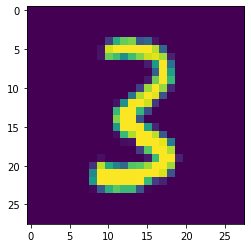

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[50000])
print(y_train[50000], type(y_train[50000]))

In [5]:
# 2차원을 1차원으로 만들어준다. 

In [6]:
x_train = x_train.reshape(-1,28*28 )
x_train.shape

(60000, 784)

In [7]:
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [8]:
y_train.shape

(60000,)

In [9]:
y_train[2:10]

array([4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# apply model

In [10]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(784,)))   # input layer
model.add(tf.keras.layers.Dense(64, activation='relu'))   # hidden layer
model.add(tf.keras.layers.Dense(64, activation='relu'))    # hidden layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))   # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


* activation : output이 범주형인데 unique값이 3개 이상일 경우 activation은 softmax를 쓰고, 바이너리(이진, 2개)일 경우에는 sigmoid를 쓴다. : output layer
* hidden layer에서만 쓰는 activation이 따로 있다. (relu)
* regression ---> loss : mse
* binary classification ---> loss : binary crossentropy
* over 3 classification ---> loss : categorical_crossentropy(sparse_categorical_crossentropy)
* activation에서 sigmoid를 쓸 경우 loss율 측정은 binary_crossentropy를 쓰고
  activation에서 softmax를 쓸 경우 loss율 측정은 categorical_crossentropy를 쓴다. 이 경우 y를 onehot 인코딩을 해줘야 한다. 만약 onehot 인코딩을 해주지 않았다면 sparse_categorical_crossentropy를 쓰면 된다. 

In [18]:
hist = model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2485 - acc: 0.9373 - val_loss: 0.3300 - val_acc: 0.9230
Epoch 2/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2109 - acc: 0.9446 - val_loss: 0.2632 - val_acc: 0.9342
Epoch 3/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1918 - acc: 0.9497 - val_loss: 0.2374 - val_acc: 0.9396
Epoch 4/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1599 - acc: 0.9556 - val_loss: 0.2033 - val_acc: 0.9509
Epoch 5/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1441 - acc: 0.9599 - val_loss: 0.2234 - val_acc: 0.9479
Epoch 6/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1321 - acc: 0.9625 - val_loss: 0.2321 - val_acc: 0.9455
Epoch 7/100
1313/1313 [==============================] - 3s 3ms/step - loss: 0.1204 - acc: 0.9658 - val_loss: 0.1832 - val_acc: 0.9543
Epoch 8/100
1313/1313 [==============================] 

# evaluation

In [20]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

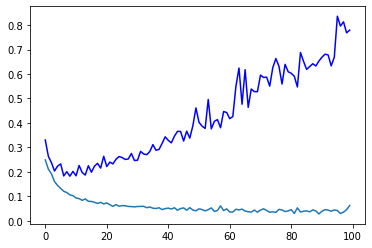

In [27]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'], 'b-')
plt.show()

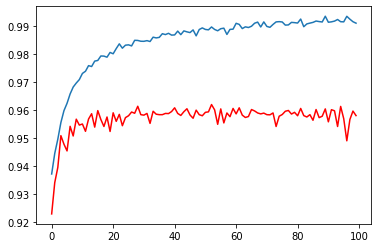

In [28]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'], 'r-')
plt.show()

# service

In [30]:
y_test[30]

3

In [32]:
model.predict(x_test[30])

ValueError: ignored